Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
# We import all the needed libraries for the CNN algorithm

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-07-13 22:25:16.172473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
# Above code is not needed since I am running the code in local machine

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train=pathlib.Path('/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test=pathlib.Path('/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               image_size=(img_height,img_width),
                                                               seed=123,
                                                               subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


2023-07-13 22:25:29.408847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               image_size=(img_height,img_width), 
                                                               seed=123,subset="validation",
                                                               validation_split=0.2)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print('Total Classes',len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Total Classes 9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

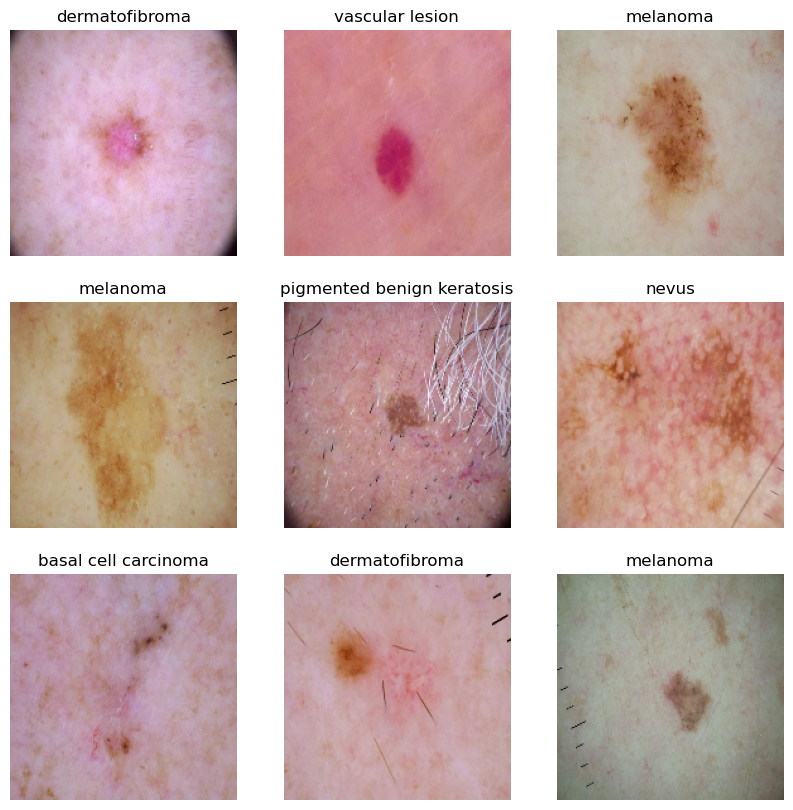

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#First Convulation layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(64,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2023-07-13 22:25:42.554162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 117 of 1000
2023-07-13 22:25:46.582388: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


169/169 [==============================] - 77s 369ms/step - loss: 1.9136 - accuracy: 0.2537 - val_loss: 1.5641 - val_accuracy: 0.3942
Epoch 2/20
169/169 [==============================] - 60s 354ms/step - loss: 1.4650 - accuracy: 0.4420 - val_loss: 1.3943 - val_accuracy: 0.4751
Epoch 3/20
169/169 [==============================] - 61s 362ms/step - loss: 1.3210 - accuracy: 0.5056 - val_loss: 1.2453 - val_accuracy: 0.5323
Epoch 4/20
169/169 [==============================] - 56s 334ms/step - loss: 1.1523 - accuracy: 0.5688 - val_loss: 1.1564 - val_accuracy: 0.5902
Epoch 5/20
169/169 [==============================] - 57s 338ms/step - loss: 1.0298 - accuracy: 0.6205 - val_loss: 1.0192 - val_accuracy: 0.6310
Epoch 6/20
169/169 [==============================] - 56s 331ms/step - loss: 0.9047 - accuracy: 0.6712 - val_loss: 0.9919 - val_accuracy: 0.6481
Epoch 7/20
169/169 [==============================] - 53s 314ms/step - loss: 0.7795 - accuracy: 0.7248 - val_loss: 0.9761 - val_accuracy: 0.6

### Visualizing training results

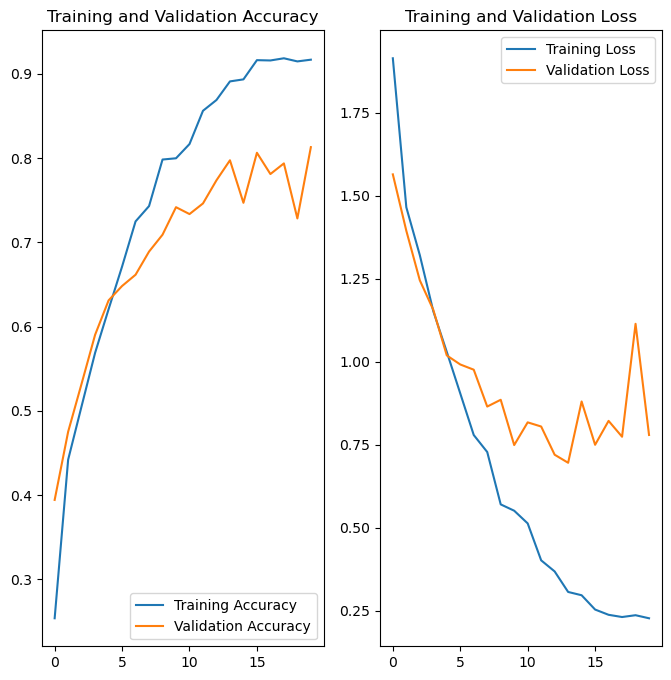

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

> From the visualization below, at first the accuracy of training and validation are increasing together in the first epochs
But as the epochs increased, the accuracy for validation increased slowly. This was the case of overfitting

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_aug = tf.keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.3, fill_mode='nearest'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

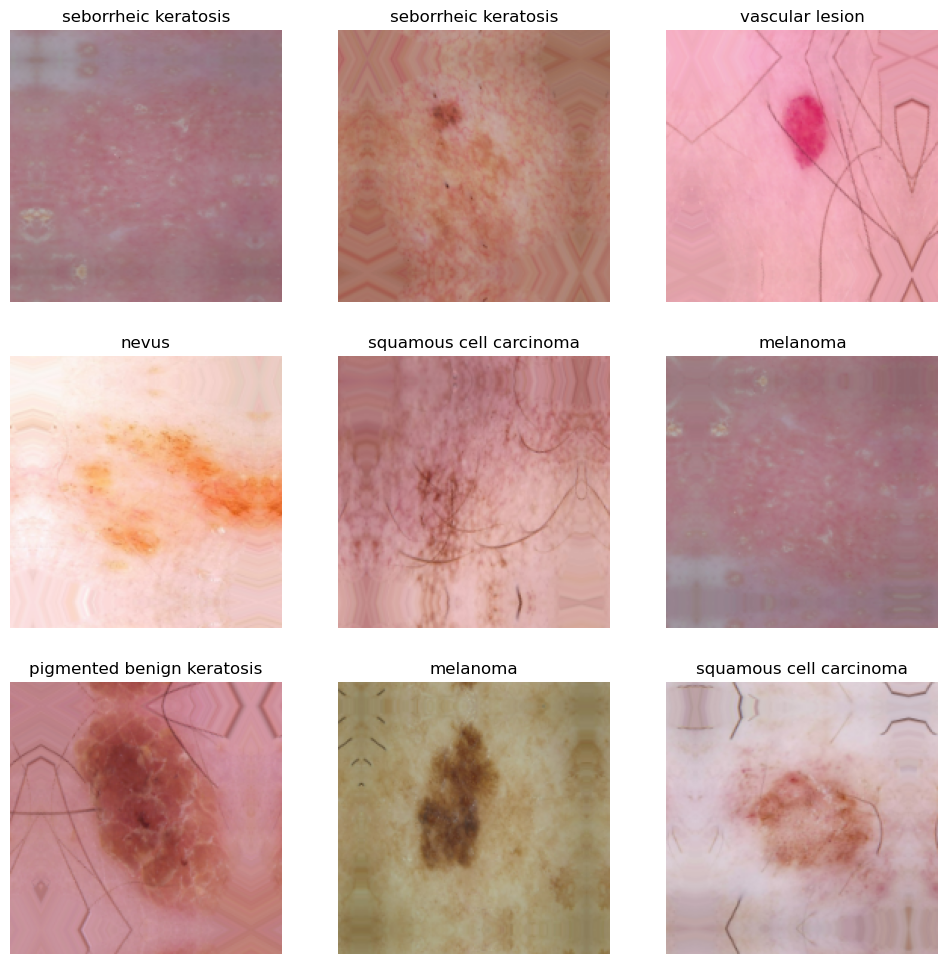

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation = "softmax"))


### Compiling the model

In [20]:
## Your code goes here
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


169/169 [==============================] - 415s 2s/step - loss: 1.9382 - accuracy: 0.2457 - val_loss: 1.6488 - val_accuracy: 0.3645
Epoch 2/20
169/169 [==============================] - 432s 3s/step - loss: 1.6087 - accuracy: 0.3833 - val_loss: 1.5237 - val_accuracy: 0.3987
Epoch 3/20
169/169 [==============================] - 404s 2s/step - loss: 1.4872 - accuracy: 0.4312 - val_loss: 1.5389 - val_accuracy: 0.4246
Epoch 4/20
169/169 [==============================] - 401s 2s/step - loss: 1.3092 - accuracy: 0.5102 - val_loss: 1.2833 - val_accuracy: 0.5197
Epoch 5/20
169/169 [==============================] - 574s 3s/step - loss: 1.1537 - accuracy: 0.5710 - val_loss: 1.1133 - val_accuracy: 0.5865
Epoch 6/20
169/169 [==============================] - 373s 2s/step - loss: 1.1320 - accuracy: 0.5899 - val_loss: 1.2077 - val_accuracy: 0.5553
Epoch 7/20
169/169 [==============================] - 416s 2s/step - loss: 1.0191 - accuracy: 0.6328 - val_loss: 1.1506 - val_accuracy: 0.5783
Epoch 8/20

### Visualizing the results

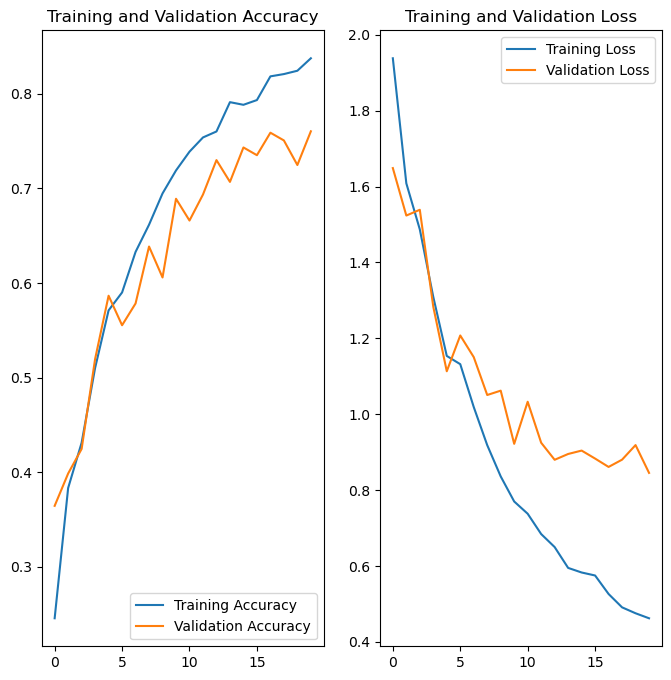

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

> We can clearly see the gap between training accuracy and validation accuracy has decreased meaning overfitting is reduced as compared to previous run. But overall accuracy has also gone down as compared to previous run.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

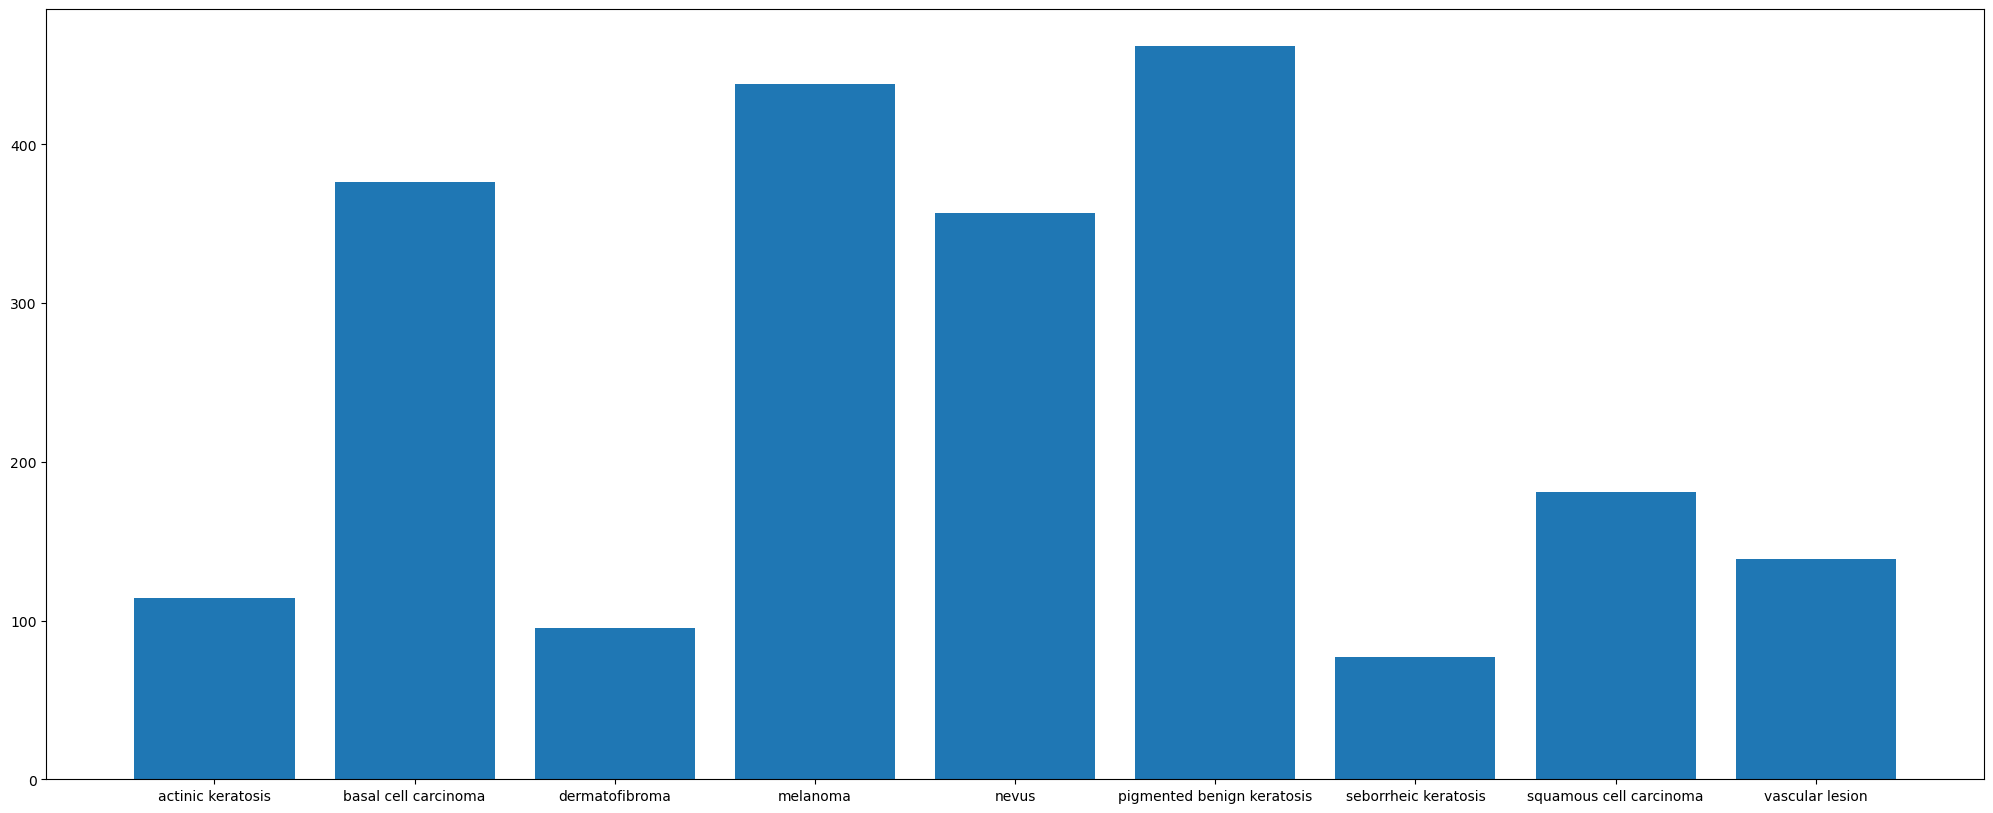

In [23]:
## Your code goes here.
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)

In [24]:
## Lets get the number of sample details in a dataframe and analyse whether there is imbalance between / across classes

path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_org = dict(zip(path_list, lesion_list))
org_df =pd.DataFrame(list(dataframe_dict_org.items()),columns = ['Path','Label'])
org_df


,Path,Label
0,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,actinic keratosis
1,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,actinic keratosis
2,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,actinic keratosis
3,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,actinic keratosis
4,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,actinic keratosis
...,...,...
2234,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,vascular lesion
2235,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,vascular lesion
2236,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,vascular lesion
2237,/Users/prampras/Desktop/My_Desktop/ST/Upgrad_A...,vascular lesion


In [25]:
# See the count of images to see if there is imbalance
org_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
> class "seborrheic keratosis" has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
> Classes "melanoma" and "pigmented benign keratosis" dominate in terms of proprtionate number of samples, with high number of samples when compared to the rest of the Classes.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
# Using Augmentor to rectify the imbalance
path_to_training_dataset="/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1ACF7FA60>: 100%|██████████| 500/500 [00:04<00:00, 115.44 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE067382B50>: 100%|██████████| 500/500 [00:04<00:00, 113.05 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE067445A00>: 100%|██████████| 500/500 [00:04<00:00, 113.20 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7FE068305E20>: 100%|██████████| 500/500 [00:27<00:00, 18.22 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE0682D1D30>: 100%|██████████| 500/500 [00:21<00:00, 23.36 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0685B8BB0>: 100%|██████████| 500/500 [00:05<00:00, 97.08 Samples/s]                   


Initialised with 77 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE06740E0D0>: 100%|██████████| 500/500 [00:11<00:00, 45.39 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE067BCEAC0>: 100%|██████████| 500/500 [00:04<00:00, 108.74 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE06737AA90>: 100%|██████████| 500/500 [00:04<00:00, 108.19 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000148.jpg_2b666262-cee7-4864-ab50-fcc5a54fbcf8.jpg',
 '/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010267.jpg_f8a459bb-07ad-4685-8a70-96909614e3f4.jpg',
 '/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010380.jpg_21a77ac5-9cff-4291-869b-7cc554a731fd.jpg',
 '/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010785.jpg_97430825-b308-4d13-b233-0bbf0931f1c3.jpg',
 '/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC 

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [33]:
new_df['Label'].value_counts()

melanoma                      1000
pigmented benign keratosis    1000
nevus                         1000
basal cell carcinoma          1000
actinic keratosis             1000
squamous cell carcinoma       1000
vascular lesion               1000
seborrheic keratosis          1000
dermatofibroma                1000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train="/Users/prampras/Desktop/My_Desktop/ST/Upgrad_AI_ML_Miscellaneous/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation', ## Todo choose the correct parameter value, so that only validation data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
## your code goes here
num_classes = 9
model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
# Convulation Layer - 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding BatchNormalization
model.add(BatchNormalization())
# Convulation Layer - 2
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding BatchNormalization
model.add(BatchNormalization())
# Convulation Layer - 3
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding BatchNormalization
model.add(BatchNormalization())
# Setting Dropout Layer with 0.25 units to drop
model.add(Dropout(0.25))
# Convulation Layer - 4
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Setting Dropout Layer with 0.5 units to drop
model.add(Dropout(0.5))
# Adding BatchNormalization
model.add(BatchNormalization())
# Flatten Layer
model.add(Flatten())
# Dense Layer
model.add(layers.Dense(128,activation='relu'))
# Setting Dropout Layer with 0.25 units to drop
model.add(Dropout(0.25))
# Dense LAyer with Softmax
model.add(Dense(num_classes, activation = "softmax"))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## your code goes here
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)       

#### **Todo:**  Train your model

In [39]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


281/281 [==============================] - 387s 1s/step - loss: 1.7627 - accuracy: 0.3461 - val_loss: 4.2510 - val_accuracy: 0.1682
Epoch 2/30
281/281 [==============================] - 383s 1s/step - loss: 1.5266 - accuracy: 0.4032 - val_loss: 4.9878 - val_accuracy: 0.2172
Epoch 3/30
281/281 [==============================] - 372s 1s/step - loss: 1.4544 - accuracy: 0.4215 - val_loss: 1.8488 - val_accuracy: 0.3587
Epoch 4/30
281/281 [==============================] - 363s 1s/step - loss: 1.4045 - accuracy: 0.4461 - val_loss: 1.9587 - val_accuracy: 0.3231
Epoch 5/30
281/281 [==============================] - 367s 1s/step - loss: 1.3530 - accuracy: 0.4632 - val_loss: 1.5031 - val_accuracy: 0.4290
Epoch 6/30
281/281 [==============================] - 372s 1s/step - loss: 1.3299 - accuracy: 0.4732 - val_loss: 3.6072 - val_accuracy: 0.3084
Epoch 7/30
281/281 [==============================] - 378s 1s/step - loss: 1.2936 - accuracy: 0.4837 - val_loss: 1.3978 - val_accuracy: 0.4735
Epoch 8/30

#### **Todo:**  Visualize the model results

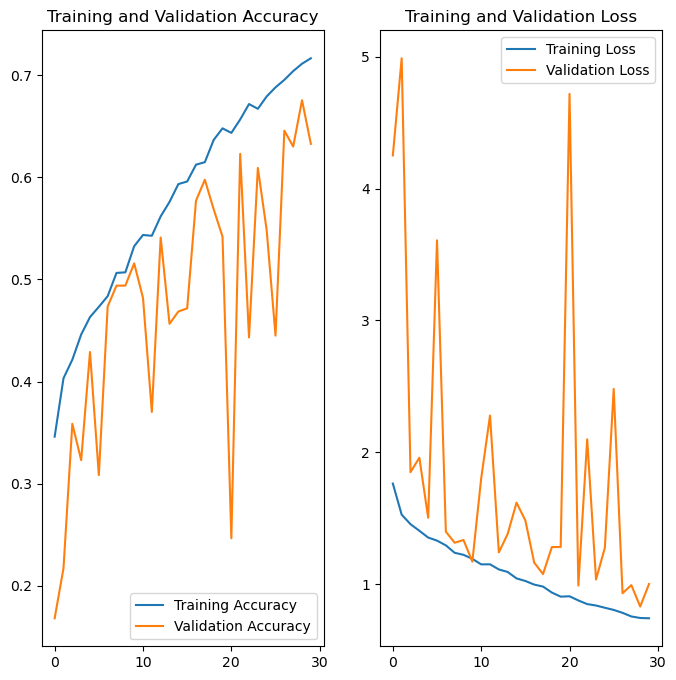

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



> The model accuracy after 30 epoch on training is aroung 80 and for val it is 71. So the model does not look to overfit. Also the accuracy have improved which resolved the underfitting issue. So, Yes, class rebalance helped to improve the model.